In [1]:
#Бұл жоба жұмысы кредит алуға ұсыныс берген клиенттердің деректерін талдау, яғни қай топ адамдары көбінесе кредитке 
#көп ұсыныс беретінін зерттеу. Сонымен қатар прогноз одобрения кредита бойынша визуализациялар жасау.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('C:\\Users\\ayaar\\Downloads\\application_record.csv', low_memory=False)

In [2]:
data.rename(columns={
    'ID': 'ID',
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_realty',
    'CNT_CHILDREN': 'children_count',
    'AMT_INCOME_TOTAL': 'income_total',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education_type',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'DAYS_BIRTH': 'days_birth',
    'DAYS_EMPLOYED': 'days_employed',
    'FLAG_MOBIL': 'has_mobile',
    'FLAG_WORK_PHONE': 'has_work_phone',
    'FLAG_PHONE': 'has_phone',
    'FLAG_EMAIL': 'has_email',
    'OCCUPATION_TYPE': 'occupation_type',
    'CNT_FAM_MEMBERS': 'family_members_count'
}, inplace=True)

print("Баған атаулары өзгертілген соң:")
print(data.columns)

print("Жоғалған мәндерді тексеру:")
print(data.isnull().sum())

# Жоғалған мәндерді толтыру
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna('Unknown', inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

data.drop_duplicates(inplace=True)

bool_columns = ['has_mobile', 'has_work_phone', 'has_phone', 'has_email']
for col in bool_columns:
    if col in data.columns:
        data[col] = data[col].astype(bool)

cat_columns = [
    'gender', 'own_car', 'own_realty', 'income_type',
    'education_type', 'family_status', 'housing_type', 'occupation_type'
]
for col in cat_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')

# Сандық бағандардың түрін түзету
if 'days_birth' in data.columns and 'days_employed' in data.columns:
    data['age_years'] = (-data['days_birth'] / 365).astype(int)
    data['employment_years'] = data['days_employed'].apply(lambda x: -x / 365 if x < 0 else np.nan)
    data.drop(['days_birth', 'days_employed'], axis=1, inplace=True)

if 'income_total' in data.columns:
    data['income_total'] = data['income_total'].astype(float)

print("Тазалаудан кейінгі деректер туралы ақпарат:")
data.info()

Баған атаулары өзгертілген соң:
Index(['ID', 'gender', 'own_car', 'own_realty', 'children_count',
       'income_total', 'income_type', 'education_type', 'family_status',
       'housing_type', 'days_birth', 'days_employed', 'has_mobile',
       'has_work_phone', 'has_phone', 'has_email', 'occupation_type',
       'family_members_count'],
      dtype='object')
Жоғалған мәндерді тексеру:
ID                           0
gender                       0
own_car                      0
own_realty                   0
children_count               0
income_total                 0
income_type                  0
education_type               0
family_status                0
housing_type                 0
days_birth                   0
days_employed                0
has_mobile                   0
has_work_phone               0
has_phone                    0
has_email                    0
occupation_type         134203
family_members_count         0
dtype: int64
Тазалаудан кейінгі деректер туралы ақпа


ID:
Mean: 6022176.269841776
Median: 6047745.0
Mode: 7022197
Std Dev: 571637.0232571186

children_count:
Mean: 0.42739028222101116
Median: 0.0
Mode: 0
Std Dev: 0.7248822135510192

income_total:
Mean: 187524.2860095039
Median: 160780.5
Mode: 135000.0
Std Dev: 110086.85306621535

family_members_count:
Mean: 2.194465029631268
Median: 2.0
Mode: 2.0
Std Dev: 0.8972073300549688

employment_years:
Mean: 7.186445752552721
Median: 5.271232876712329
Mode: 0.5972602739726027
Std Dev: 6.574011652470739

Категориялық айнымалылардың жиілігі (groupby):


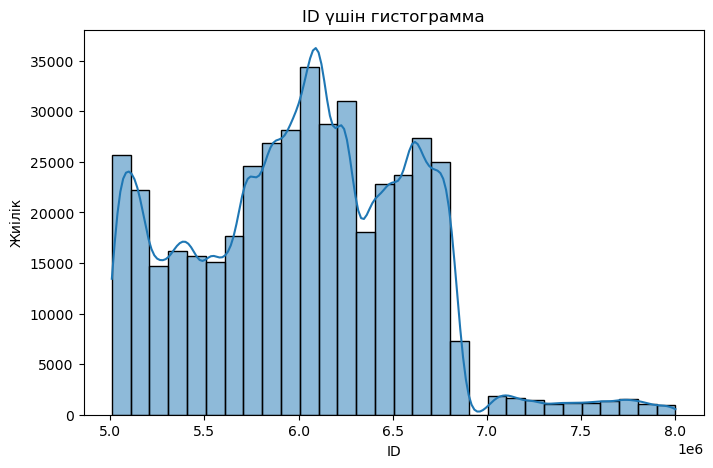

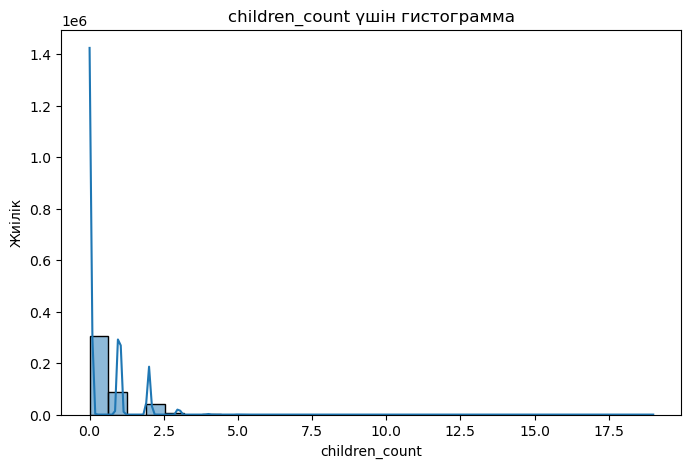

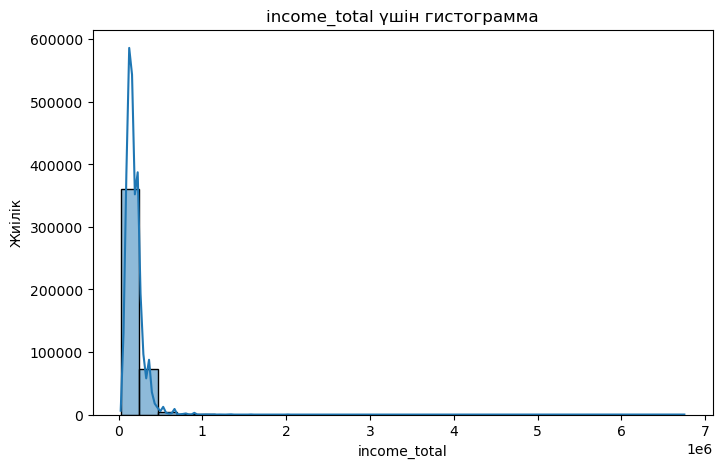

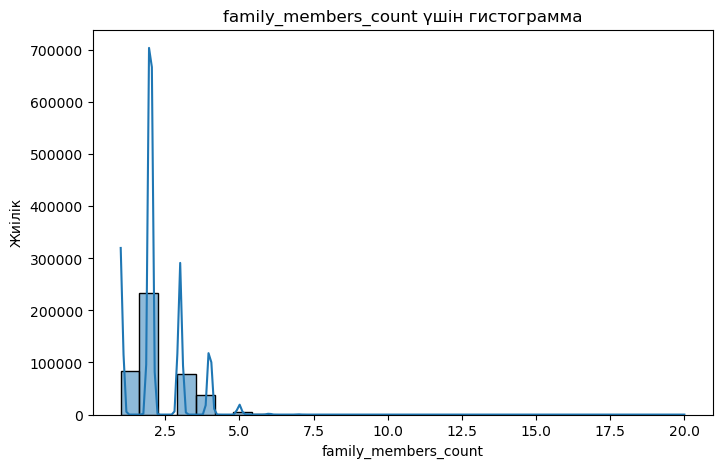

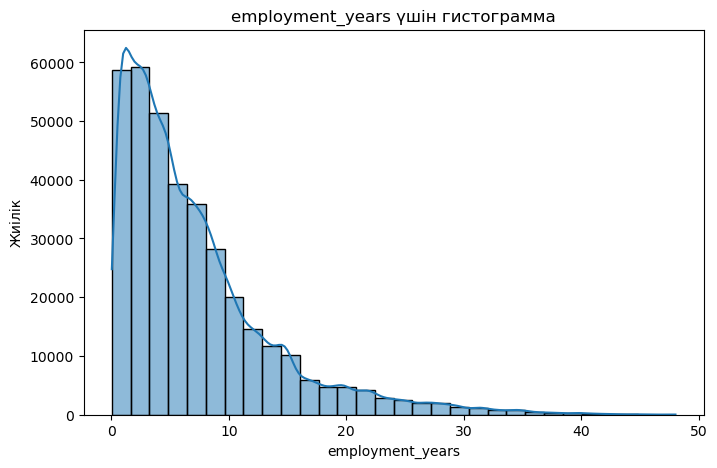

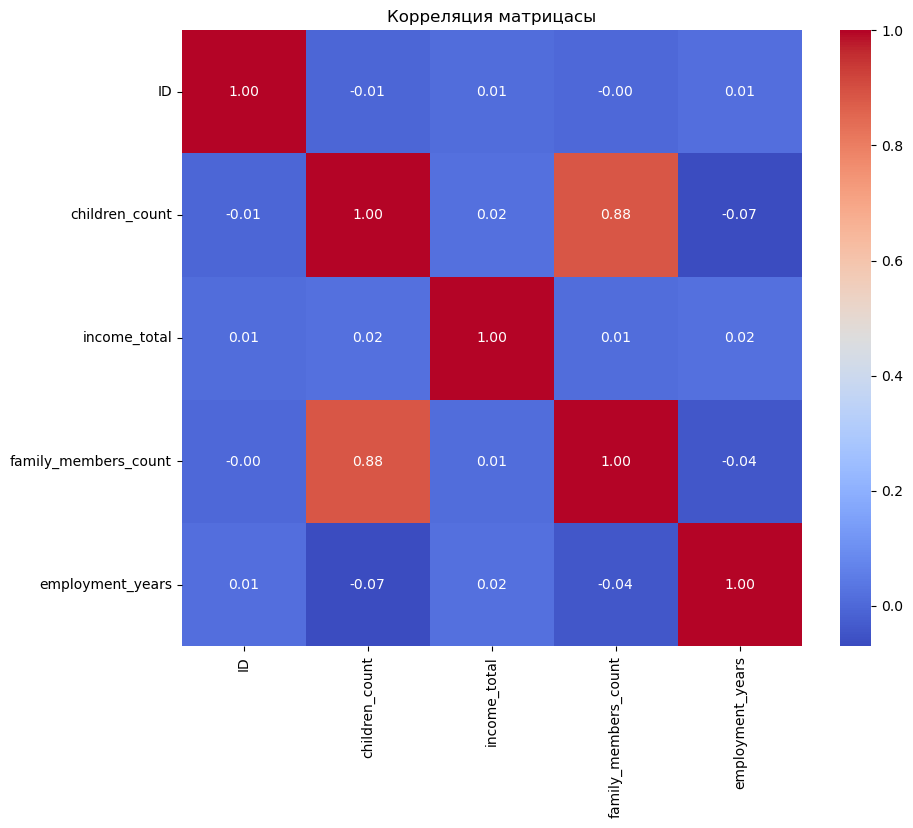

C:\Users\ayaar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


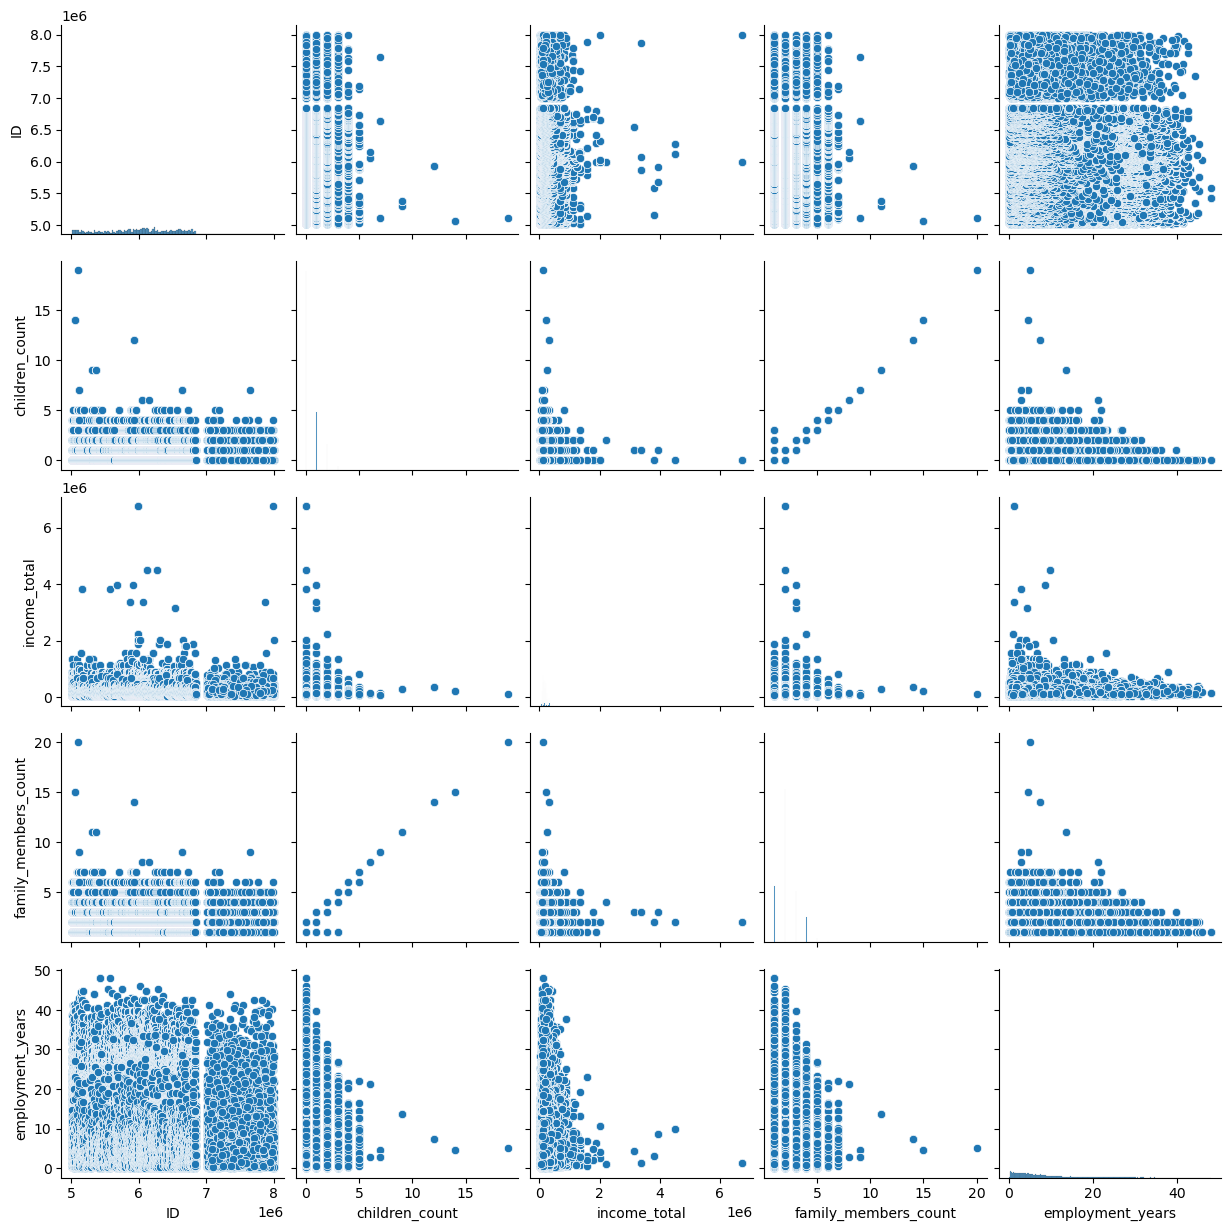

In [4]:
# 1. Сипаттамалық статистика (сандық айнымалылар үшін)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    print(f"\n{col}:")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Mode: {data[col].mode()[0]}")
    print(f"Std Dev: {data[col].std()}")

# 2. Категориялық айнымалыларды талдау
cat_columns = data.select_dtypes(include=['object']).columns
print("\nКатегориялық айнымалылардың жиілігі (groupby):")
for col in cat_columns:
    grouped = data.groupby(col).size().reset_index(name='counts')
    print(f"\n{col}:")
    print(grouped)

# 3. Визуализация жасау
# Гистограмма сандық айнымалылар үшін
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"{col} үшін гистограмма")
    plt.xlabel(col)
    plt.ylabel("Жиілік")
    plt.show()

# Бағандық диаграмма категориялық айнымалылар үшін
for col in cat_columns:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{col} үшін бағандық диаграмма")
    plt.xlabel(col)
    plt.ylabel("Жиілік")
    plt.show()

# 4. Корреляция матрицасы және pairplot
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляция матрицасы")
plt.show()

# Pairplot негізгі сандық айнымалылар үшін
sns.pairplot(data[numerical_columns])
plt.show()


In [5]:
credit_data = pd.read_csv('C:\\Users\\ayaar\\Downloads\\credit_record.csv', low_memory=False)
# 1. Жаңа бағандарды қосу
# Ай сайынғы кірісті есептеу
data['income_per_family_member'] = data['income_total'] / data['family_members_count']


# 2. Сүзу және сұрыптау
high_income_clients = data[data['income_total'] > 300000]

sorted_clients = data.sort_values(by='family_members_count', ascending=True)

#3 Бириктиру
merged_data = data.merge(credit_data, on='ID', how='left')

# 4. Сандық және категориялық мәліметтерді түрлендіру
data['gender_numeric'] = data['gender'].map({'M': 1, 'F': 0})

data['own_car_numeric'] = data['own_car'].map({'Y': 1, 'N': 0})

# 5. Сүзу мүмкіндіктерін көрсету
filtered_data = data[(data['family_members_count'] > 2) & (data['income_total'] > 200000)]

print("Қорытынды деректер туралы ақпарат:")
print(data.head(5))
print("Отбасы мүшелері саны бойынша өсу ретімен сұрыптау",sorted_clients)
print("Екі деректер жиынтығын 'ID' бағаны арқылы біріктіру" ,merged_data)
print("Сүзу",filtered_data)



Қорытынды деректер туралы ақпарат:
        ID gender own_car own_realty  children_count  income_total  \
0  5008804      M       Y          Y               0      427500.0   
1  5008805      M       Y          Y               0      427500.0   
2  5008806      M       Y          Y               0      112500.0   
3  5008808      F       N          Y               0      270000.0   
4  5008809      F       N          Y               0      270000.0   

            income_type                 education_type         family_status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

        housing_type  ...  has_work_phone  has_phone  has_email

In [6]:
def custom_function(x):
    return x * 2

data['dohod 2x'] = data['income_total'].apply(custom_function)
print(data['dohod 2x'].head(5))


0    855000.0
1    855000.0
2    225000.0
3    540000.0
4    540000.0
Name: dohod 2x, dtype: float64


In [7]:
#Пивот-кесте құру
pivot_table_extended = data.pivot_table(
    values=['income_total', 'income_per_family_member'],
    index=['education_type', 'housing_type'],
    aggfunc={
        'income_total': 'sum', 
        'income_per_family_member': 'mean'
    }
)

# Пивот-кестені көрсету
print("Пивот-кесте:")
print(pivot_table_extended)


Пивот-кесте:
                                                   income_per_family_member  \
education_type                housing_type                                    
Academic degree               Co-op apartment                           NaN   
                              House / apartment               126720.198675   
                              Municipal apartment                       NaN   
                              Office apartment                351000.000000   
                              Rented apartment                187500.000000   
                              With parents                    135000.000000   
Higher education              Co-op apartment                 112399.743777   
                              House / apartment               121020.949519   
                              Municipal apartment             124777.385980   
                              Office apartment                127927.681852   
                              Rented ap

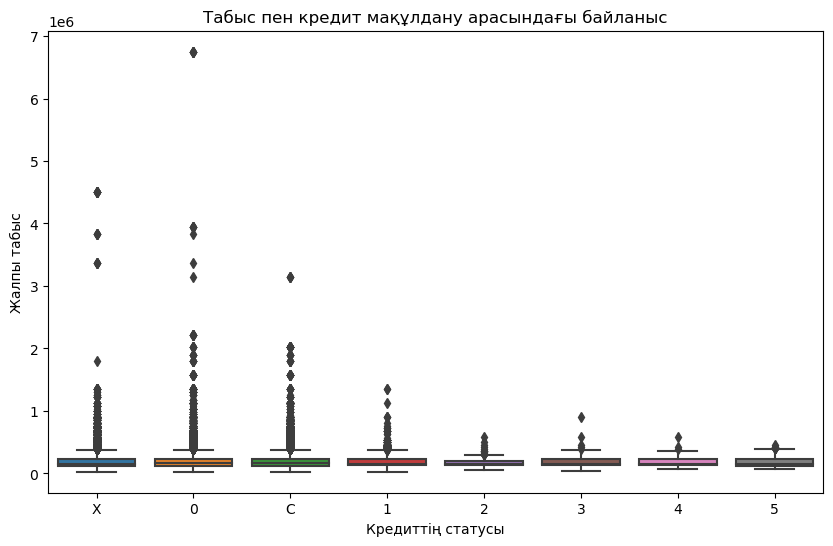

In [8]:
# 1. Табыс пен мақұлдану арасындағы байланыс (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=credit_data['STATUS'], y=data['income_total'])
plt.title("Табыс пен кредит мақұлдану арасындағы байланыс")
plt.xlabel("Кредиттің статусы")
plt.ylabel("Жалпы табыс")
plt.show()


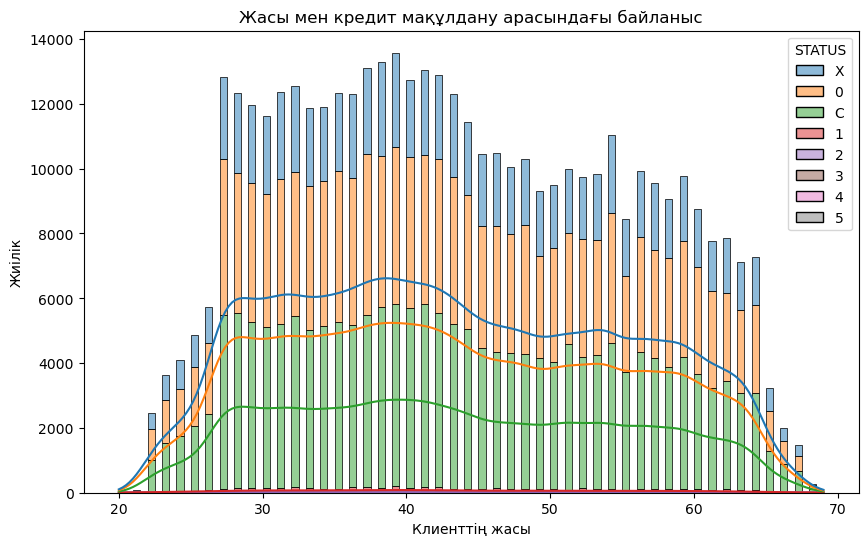

In [9]:
# 2. Жасы мен мақұлдану арасындағы байланыс (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age_years', hue=credit_data['STATUS'], multiple='stack', kde=True)
plt.title("Жасы мен кредит мақұлдану арасындағы байланыс")
plt.xlabel("Клиенттің жасы")
plt.ylabel("Жиілік")
plt.show()

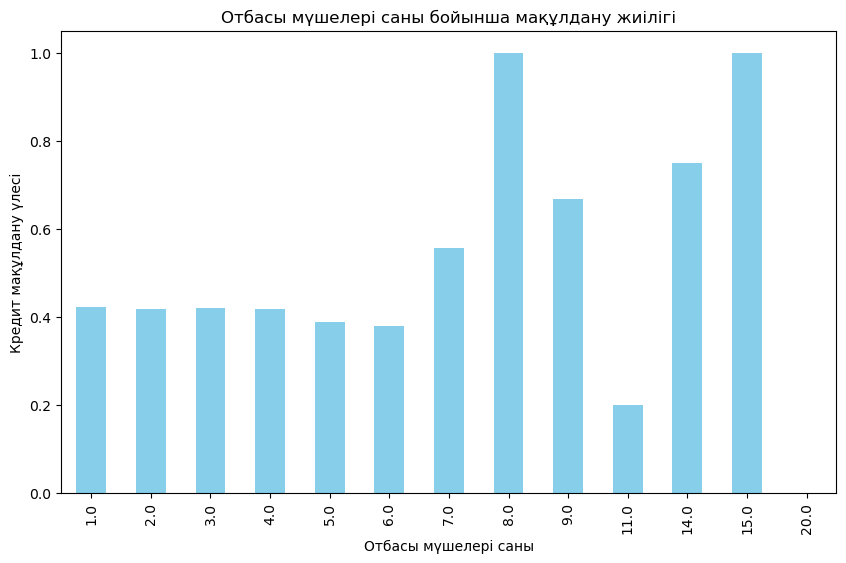

In [10]:
# 3. Отбасы мүшелері саны бойынша мақұлдану жиілігі (Barplot)
data['approval'] = credit_data['STATUS'].apply(lambda x: 1 if x == 'C' else 0)
family_approval = data.groupby('family_members_count')['approval'].mean()
plt.figure(figsize=(10, 6))
family_approval.plot(kind='bar', color='skyblue')
plt.title("Отбасы мүшелері саны бойынша мақұлдану жиілігі")
plt.xlabel("Отбасы мүшелері саны")
plt.ylabel("Кредит мақұлдану үлесі")
plt.show()
